# Dask DataFrame

Материалы:
* Макрушин С.В. Лекция 13: Dask DataFrame
* https://docs.dask.org/en/latest/dataframe.html
* JESSE C. DANIEL. Data Science with Python and Dask.

## Задачи для совместного разбора

1. Считать данные из файлов в каталоге `accounts`. Содержат ли какие-либо из столбцов пропуски?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import dask.dataframe as dd
df = dd.read_csv('/content/drive/MyDrive/tobd/accounts/accounts.*.csv', dtype={'amount': 'float64'})
df.isnull().any().compute()

id        False
names     False
amount     True
dtype: bool

In [ ]:
# df = dd.read_csv('/content/drive/MyDrive/tobd/accounts2/accounts.*.csv', dtype={'amount': 'float64'})
# df.isnull().any().compute()

id        False
names     False
amount    False
dtype: bool

2. Подсчитать количество раз, которое то или иное имя встретилось в выборке. Вывести самое часто встречающееся имя.

In [ ]:
df['names'].value_counts().compute()

Norbert     188147
Alice       185892
George      183249
Tim         162432
Bob         157065
Michael     148372
Ingrid      132067
Oliver      121907
Quinn       118071
Wendy       110657
Charlie     109236
Ursula      108745
Hannah      108632
Ray         108610
Sarah       104781
Victor      102656
Frank        99984
Laura        97216
Jerry        96378
Xavier       94445
Edith        89991
Zelda        89047
Kevin        84784
Dan          73293
Patricia     62881
Yvonne       61462
Name: names, dtype: int64

3. Создать новую колонку, которая является результатом от деления значения `amount` нацело на 100, если `amount` > 100, и нулём в противном случае.

In [ ]:
df['amount2'] = df['amount'].apply(lambda x: x // 100 if x > 100 else 0)
df.compute()

/usr/local/lib/python3.9/dist-packages/dask/dataframe/core.py:4134: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('amount', 'int64'))

  warnings.warn(meta_warning(meta))


,id,names,amount,amount2
0,39,Victor,205.0,2.0
1,289,Hannah,87.0,0.0
2,234,Victor,1820.0,18.0
3,155,Ray,-600.0,0.0
4,266,Ray,572.0,5.0
...,...,...,...,...
999995,270,Edith,810.0,8.0
999996,249,Norbert,132.0,1.0
999997,308,Kevin,20.0,0.0
999998,302,Tim,33.0,0.0


## Лабораторная работа 13

In [ ]:
import dask.dataframe as dd
import pandas as pd
import dask.bag as db
import json
import dask

1. В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты.

In [ ]:
recipes = dd.read_csv('/content/drive/MyDrive/tobd/recipes_full/recipes_full_*.csv',
                      dtype={'minutes': 'float64','n_steps': 'float64'},  parse_dates=['submitted'])
recipes.compute()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970,vant ivoire mickies nothing,33.0,803776,2019-08-22,4.0,pat and gina neely and their family own and op...,9
1,1089012,kremsils mariposa baccala cookies class borage...,23.0,51579,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5
2,1428572,tania lander,0.0,68884,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5
3,1400250,heloise milli asher doogh zojirushi,24.0,678862,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1
4,387709,nutty chocolate chunk cookies,47.0,489552,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10
...,...,...,...,...,...,...,...,...
278949,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
278950,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
278951,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
278952,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9


2. Выведите метаинформацию о таблице: `npartitions` и типы столбцов.

In [ ]:
recipes

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
npartitions=8,,,,,,,,
,int64,object,float64,int64,datetime64[ns],float64,object,int64
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


3. Выведите на экран 5 первых строк таблицы. Выведите на экран 5 последних строк таблицы. В случае сообщения об ошибки объясните причину и исправьте ошибку.

In [ ]:
recipes.tail(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
278949,1029131,tuti waffle snackies steakhouse,19.0,171345,1973-10-18,4.0,"according to a providence journal article, ama...",4
278950,1700703,noelias cheats crocante fleisch zitumbuwa,1.0,30228,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1
278951,1910650,rubbed restuffed pelmeni bedouin flavourful,60.0,591905,2009-09-26,3.0,another great recipe to add to the growing swe...,2
278952,713836,stems polpettine peezi,NaN,357389,2003-09-30,4.0,adapted from top secret recipes. love this!,9
278953,660699,clementines,64.0,29196,1973-06-03,6.0,this would make a great start to your holiday ...,8


4. Посчитайте, сколько строк содержит каждый из блоков

In [ ]:
def count_rows(df):
    return len(df)
recipes.map_partitions(count_rows).compute()


0    278955
1    278955
2    278955
3    278955
4    278955
5    278954
6    278954
7    278954
dtype: int64

5. Найдите максимум в столбце `n_steps`. Визуализируйте граф вычислений для этой задачи. Прокомментируйте логику работы `dask` в этом случае.

In [ ]:
mx = recipes['n_steps'].max()
mx.compute()

145.0

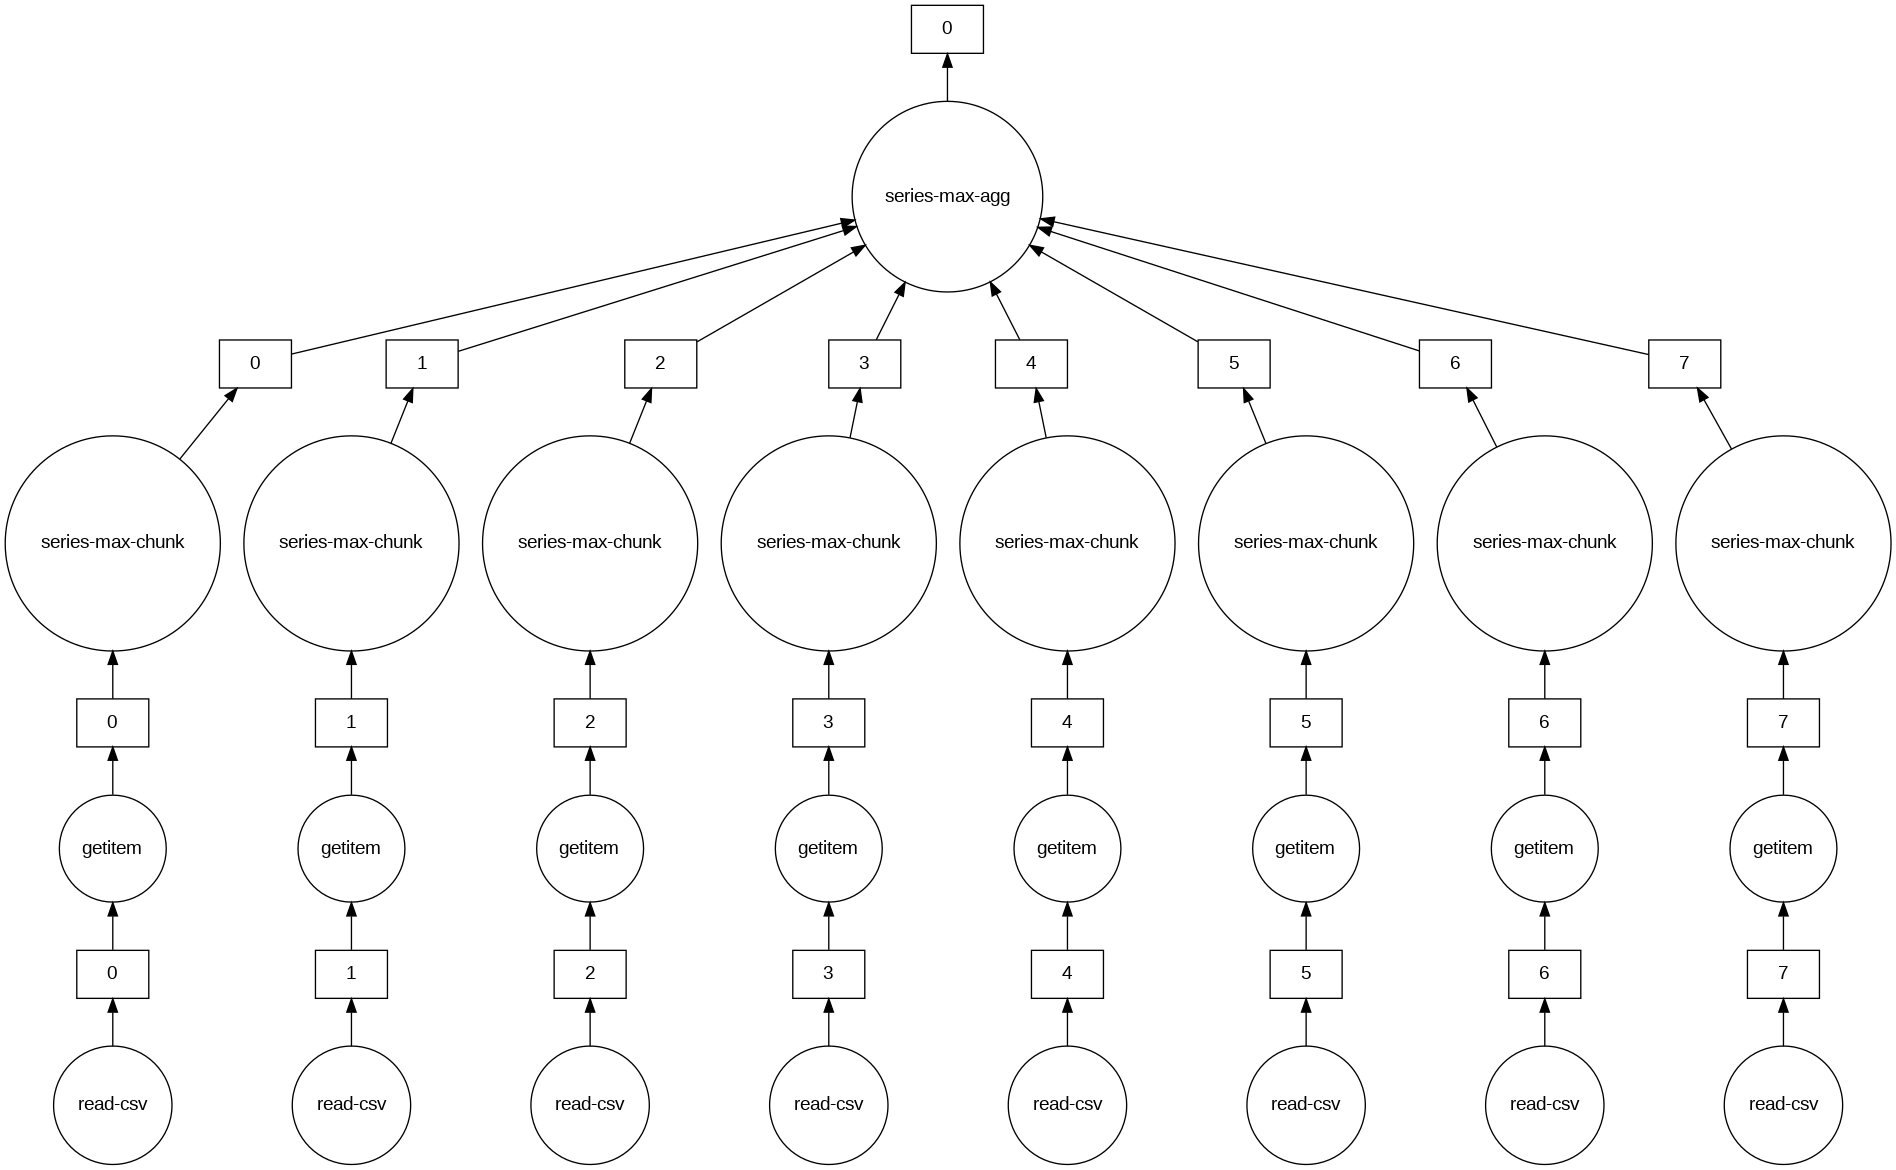

In [ ]:
mx.visualize()

6. Посчитайте количество отзывов с группировкой по месяцам добавления отзыва в базу.

In [ ]:
count_by_month = recipes.groupby(recipes['submitted'].dt.strftime('%Y-%m'))['id'].count().compute()
count_by_month

submitted
1970-01    3306
1970-02    2943
1970-03    3324
1970-04    3245
1970-05    3284
           ... 
2021-04    3139
2021-05    3223
2021-06    3128
2021-07    3342
2021-08    1195
Name: id, Length: 620, dtype: int64

7. Считайте файлы из архива `reviews_full.zip` (__ЛР12__) в виде `dask.bag`. Пользуясь результатом лабораторной работы 12, рассчитайте среднее значение оценок отзывов с группировкой по месяцам. После завершения всех вычислений преобразуйте результат к `pd.Series`.

In [ ]:
def modifiedLoads(x):
  dct = json.loads(x[0])
  dct["rating"] = int(x[1][-6])
  return dct

bag = db.read_text("/content/drive/MyDrive/tobd/reviews_full/reviews_*.json", include_path=True).map(modifiedLoads)
df = bag.to_dataframe()
df['date'] = dd.to_datetime(df['date'])
new_df = df[['date', 'rating']]
mean_ratings_by_month = pd.Series(new_df.groupby(new_df['date'].dt.strftime('%Y-%m'))['rating'].mean().compute())
mean_ratings_by_month

date
1970-02    4.333333
1970-03    4.229167
1970-04    4.456140
1970-06    4.408163
1970-07    4.380597
             ...   
2021-06    4.406870
2021-07    4.406771
2021-08    4.413223
1970-01    4.375000
1970-05    4.636364
Name: rating, Length: 620, dtype: float64

8. Пользуясь результатами решения задач 6 и 7, создайте `pd.DataFrame`, содержащий два столбца: `mean_rating`, `recipes_count`

In [ ]:
df8 = pd.DataFrame([count_by_month, mean_ratings_by_month]).transpose()
df8.columns = ['recipes_count','mean_rating']
df8

,recipes_count,mean_rating
1970-01,3306.0,4.375000
1970-02,2943.0,4.333333
1970-03,3324.0,4.229167
1970-04,3245.0,4.456140
1970-05,3284.0,4.636364
...,...,...
2021-04,3139.0,4.407256
2021-05,3223.0,4.407575
2021-06,3128.0,4.406870
2021-07,3342.0,4.406771
